In [84]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np


Define file paths for processed CSV data.

In [85]:
CLEAN_HOPS_PATH = './rc_clean_data/rc_cln_hops_brewvalues.csv'
CLEAN_HOPS_PROFILE_PATH = './rc_clean_data/rc_cln_hops_profile.csv'


Read in raw CSV data into local dataframes.

In [86]:
hops_v = pd.read_csv(CLEAN_HOPS_PATH, index_col='Hop Name')
hops_p = pd.read_csv(CLEAN_HOPS_PROFILE_PATH, index_col='Hop Name')


Combine dataframes to have all the hop data in one dataframe

In [87]:
hops_main = pd.concat([hops_v, hops_p], axis=1)
hops_main.head()


,Alpha Acid % - Min,Alpha Acid % - Max,Alpha Acid % - Avg,Beta Acid % - Min,Beta Acid % - Max,Beta Acid % - Avg,Alpha-Beta Ratio - Min,Alpha-Beta Ratio - Max,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Min,...,violet,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,7.0,10.0,8.5,4.0,6.0,5.0,1.0,3.0,2.0,26.0,...,False,False,False,False,True,False,False,False,False,False
Eclipse,15.7,19.0,17.4,5.9,9.0,7.5,2.0,3.0,2.0,33.0,...,False,False,False,False,False,False,False,False,False,False
Ella,13.3,19.2,16.3,4.0,7.8,5.9,2.0,5.0,3.0,33.0,...,False,False,False,False,False,False,False,False,False,False
Enigma,13.5,19.4,16.5,4.5,7.1,5.8,2.0,4.0,3.0,37.0,...,False,False,False,False,True,False,False,False,False,False
Feux-Coeur Francais,12.0,16.0,14.0,3.1,6.0,4.6,2.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shorten 'United States of America' to 'USA'. This will look cleaner on plots

In [88]:
hops_main['Country'].replace("United States of America", "USA", inplace=True)


Make a new column for continent.

In [89]:
hops_main['Continent'] = hops_main['Country'].copy()
hops_main['Continent'].replace({
    'Australia': 'Australia',
    'Canada': 'N. America',
    'China': 'Asia',
    'Czech Republic': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'New Zealand': 'Australia',
    'Poland': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'USA': 'N. America'},
    inplace=True)

hops_main


,Alpha Acid % - Min,Alpha Acid % - Max,Alpha Acid % - Avg,Beta Acid % - Min,Beta Acid % - Max,Beta Acid % - Avg,Alpha-Beta Ratio - Min,Alpha-Beta Ratio - Max,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Min,...,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,7.0,10.0,8.5,4.0,6.0,5.0,1.0,3.0,2.0,26.0,...,False,False,False,True,False,False,False,False,False,Australia
Eclipse,15.7,19.0,17.4,5.9,9.0,7.5,2.0,3.0,2.0,33.0,...,False,False,False,False,False,False,False,False,False,Australia
Ella,13.3,19.2,16.3,4.0,7.8,5.9,2.0,5.0,3.0,33.0,...,False,False,False,False,False,False,False,False,False,Australia
Enigma,13.5,19.4,16.5,4.5,7.1,5.8,2.0,4.0,3.0,37.0,...,False,False,False,True,False,False,False,False,False,Australia
Feux-Coeur Francais,12.0,16.0,14.0,3.1,6.0,4.6,2.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zappa,6.0,9.0,7.5,8.0,9.0,8.5,1.0,1.0,1.0,40.0,...,False,False,False,False,False,False,False,False,False,N. America
Zenia,11.0,14.0,12.5,4.4,5.1,4.8,2.0,3.0,3.0,NaN,...,False,False,False,False,False,False,False,False,False,N. America
Zenith,9.0,11.0,10.0,NaN,NaN,3.0,inf,4.0,inf,NaN,...,False,False,False,False,False,False,False,False,False,N. America


Select only the average columns + Purpose, Country, and Continent. This would be most useful for the plots.

In [90]:
hops_bv = pd.DataFrame(hops_main, columns=[
    'Alpha Acid % - Avg',
    'Beta Acid % - Avg',
    'Alpha-Beta Ratio - Avg',
    'Co-Humulone as % of Alpha - Avg',
    'Total Oils (mL/100g) - Avg',
    'Myrcene - Avg',
    'Humulene - Avg',
    'Caryophyllene - Avg',
    'Farnesene - Avg',
    'Purpose',
    'Country',
    'Continent'])

hops_bv.head()


,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Purpose,Country,Continent
Hop Name,,,,,,,,,,,,
Astra,8.5,5.0,2.0,27.0,2.0,NaN,7.0,NaN,NaN,Dual,Australia,Australia
Eclipse,17.4,7.5,2.0,35.0,2.3,42.0,1.0,9.0,0.5,Dual,Australia,Australia
Ella,16.3,5.9,3.0,36.5,2.9,42.0,18.5,11.5,13.0,Dual,Australia,Australia
Enigma,16.5,5.8,3.0,40.0,2.4,26.5,15.5,7.0,10.5,Aroma,Australia,Australia
Feux-Coeur Francais,14.0,4.6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Bittering,Australia,Australia


Inspect the features of the dataframe.

In [91]:
hops_bv.info()


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, Astra to Zythos
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Alpha Acid % - Avg               304 non-null    float64
 1   Beta Acid % - Avg                297 non-null    float64
 2   Alpha-Beta Ratio - Avg           281 non-null    float64
 3   Co-Humulone as % of Alpha - Avg  274 non-null    float64
 4   Total Oils (mL/100g) - Avg       287 non-null    float64
 5   Myrcene - Avg                    242 non-null    float64
 6   Humulene - Avg                   236 non-null    float64
 7   Caryophyllene - Avg              220 non-null    float64
 8   Farnesene - Avg                  234 non-null    float64
 9   Purpose                          304 non-null    object 
 10  Country                          304 non-null    object 
 11  Continent                        304 non-null    object 
dtypes: float64(9), objec

Check for null values.

In [92]:
hops_bv.isnull().sum()


Alpha Acid % - Avg                  0
Beta Acid % - Avg                   7
Alpha-Beta Ratio - Avg             23
Co-Humulone as % of Alpha - Avg    30
Total Oils (mL/100g) - Avg         17
Myrcene - Avg                      62
Humulene - Avg                     68
Caryophyllene - Avg                84
Farnesene - Avg                    70
Purpose                             0
Country                             0
Continent                           0
dtype: int64

Dataset without NAs:

In [93]:
hops_bv = hops_bv.dropna(axis=0)

hops_bv


,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Purpose,Country,Continent
Hop Name,,,,,,,,,,,,
Eclipse,17.4,7.5,2.0,35.0,2.3,42.0,1.0,9.0,0.5,Dual,Australia,Australia
Ella,16.3,5.9,3.0,36.5,2.9,42.0,18.5,11.5,13.0,Dual,Australia,Australia
Enigma,16.5,5.8,3.0,40.0,2.4,26.5,15.5,7.0,10.5,Aroma,Australia,Australia
Galaxy,13.5,7.0,2.0,37.0,3.4,51.0,1.5,10.0,4.0,Dual,Australia,Australia
Helga,6.4,6.0,1.0,21.5,0.8,7.0,45.0,27.5,0.5,Aroma,Australia,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
Zamba Blend,10.0,5.0,2.0,30.0,2.0,65.0,11.0,6.5,2.5,Aroma,USA,N. America
Zappa,7.5,8.5,1.0,42.5,2.2,64.5,4.5,8.5,0.5,Aroma,USA,N. America
Zenith,10.0,3.0,inf,25.0,1.8,52.0,19.0,6.5,0.5,Bittering,USA,N. America


Hop count per country

In [94]:
fig = px.bar(hops_bv, x="Country", color="Purpose", labels={
             "x": "Country", "count": "Count"}, title="Number of Hops per Country", hover_data=['Continent'], width=800, height=1000)
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total descending'})

fig.show()


Violin Plots

In [95]:
for i in hops_bv.columns[:9]:
    fig = px.violin(hops_bv, y=i, height=500, width=500)
    fig.show()
    if i.startswith("Total"):
        fig.write_image("images/Violin_TotalOil.png")
    else:
        fig.write_image(f"images/Violin_{i}.png")



Box-whisker Plots

In [96]:
for i in hops_bv.columns[:9]:
    fig = px.box(hops_bv, y=i, height=500, width=500)
    fig.show()
    if i.startswith("Total"):
        fig.write_image("images/Box_TotalOil.png")
    else:
        fig.write_image(f"images/Box_{i}.png")


Pairplot

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\li

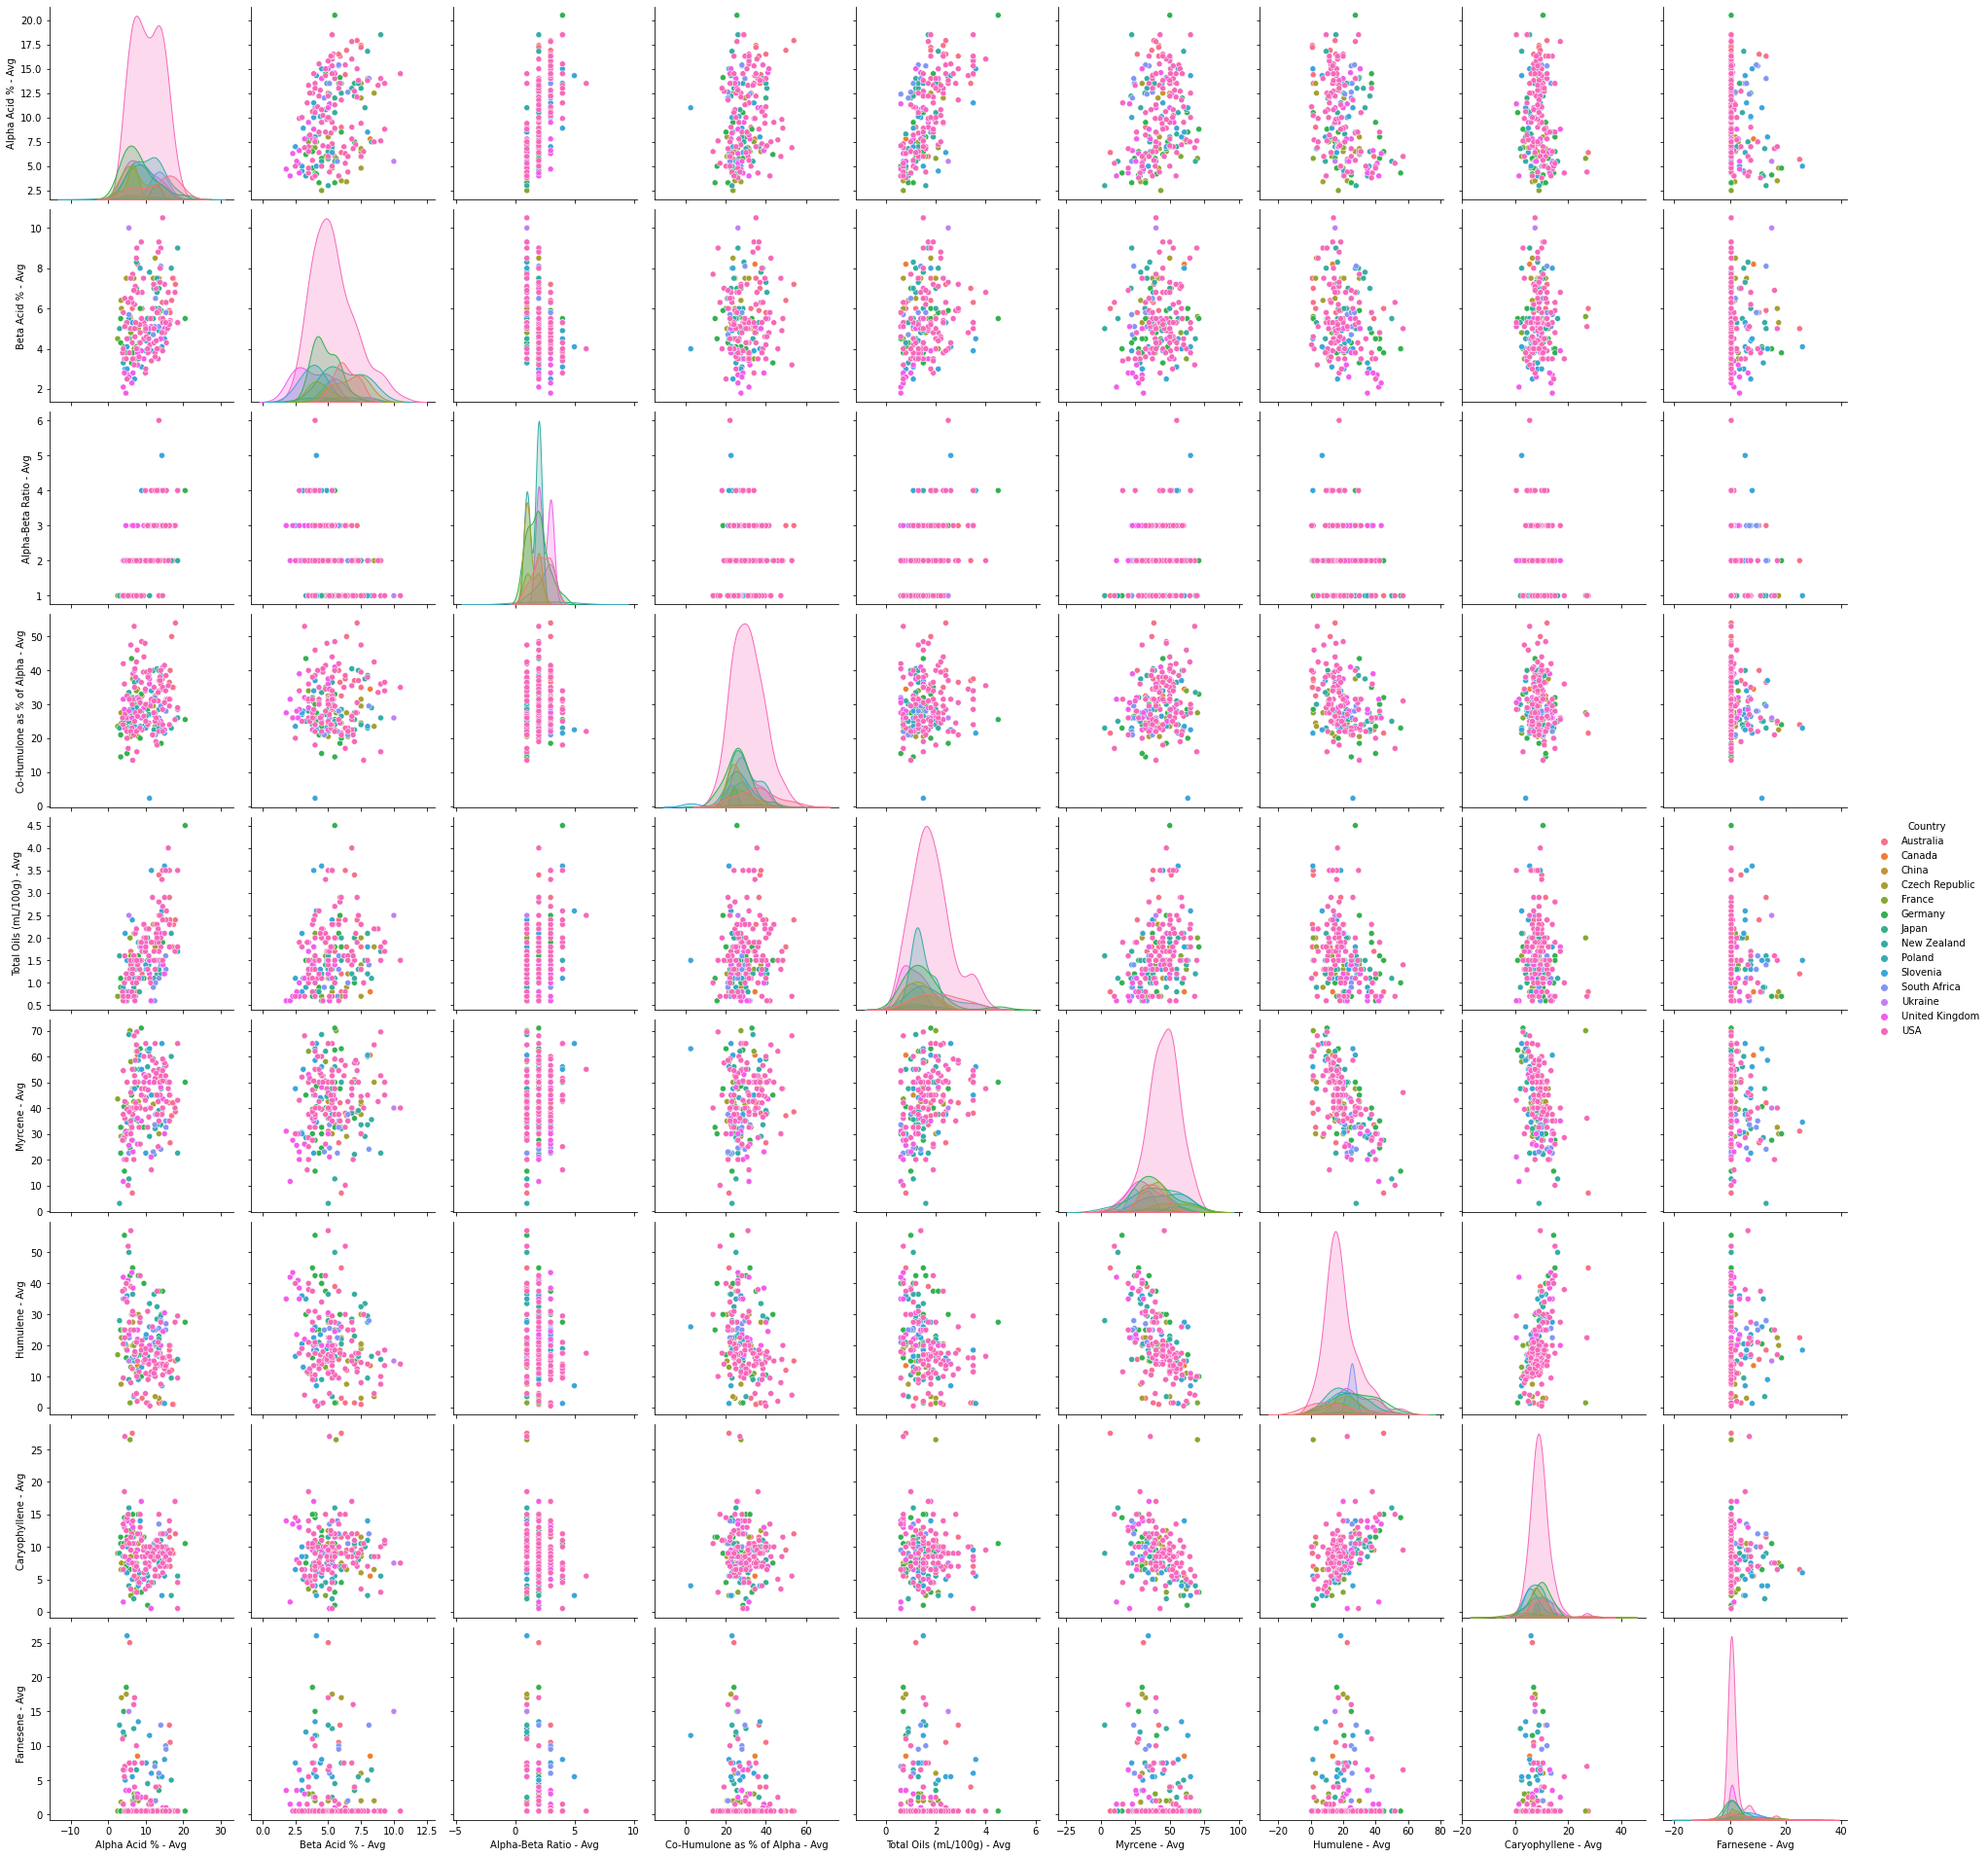

In [97]:
fig = sns.pairplot(hops_bv, height=3, hue='Country')
fig.savefig('images/Pairplot.png') 

Heatmap

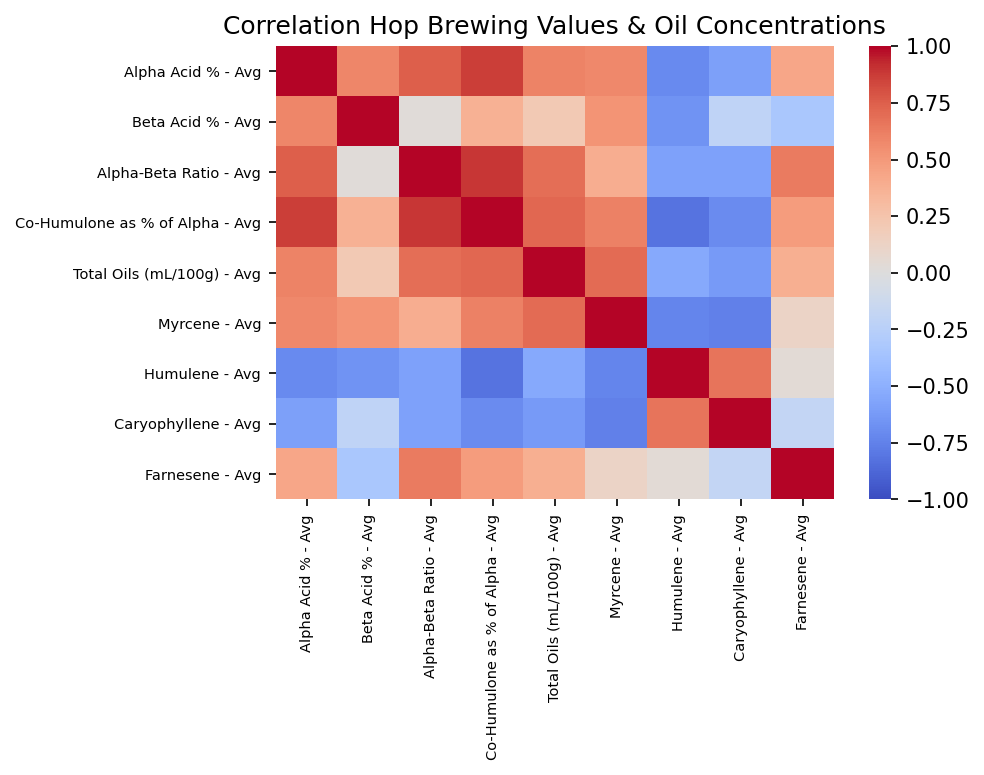

In [98]:
plt.figure(dpi=150)
fig = sns.heatmap(hops_bv[:9].corr(), cmap='coolwarm', vmax=1,
            vmin=-1, xticklabels=True, yticklabels=True)
plt.title("Correlation Hop Brewing Values & Oil Concentrations")
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('images/heatmap.png', dpi=200, bbox_inches = "tight")
plt.show()


Make a dataframe consisting of the aroma tags, country, purpose, and continent. Then drop rows with NAs.

In [99]:
hops_tags = hops_p.copy()
hops_tags['Continent'] = hops_tags['Country'].copy()
hops_tags['Continent'].replace({
    'Australia': 'Australia',
    'Canada': 'N. America',
    'China': 'Asia',
    'Czech Republic': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'New Zealand': 'Australia',
    'Poland': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States of America': 'N. America'},
    inplace=True)

hops_tags = hops_tags.dropna(axis=0)

hops_tags


,Purpose,Country,alfalfa,allspice,almond,anise,apple,apricot,balsamic,banana,...,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Eclipse,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia
Ella,Dual,Australia,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Galaxy,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zappa,Aroma,United States of America,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,N. America
Zenia,Dual,United States of America,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,N. America
Zenith,Bittering,United States of America,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,N. America


Inspect the the value counts in hops_tags. Drop columns that have less than 20 entries. This leaves a dataset with the 21 most used aroma profiles.

In [100]:
# TOP 21

for i in hops_tags.columns[2:-1]:
    # print(hops_tags[i].value_counts())
    # print()
    if hops_tags[i].value_counts()[True] < 20:
        # print(i)
        # print(len(hops_tags.columns))
        hops_tags = hops_tags.drop([i], axis=1)
        # print(len(hops_tags.columns))

hops_tags


,Purpose,Country,black_pepper,citrus,earthy,floral,fruity,grapefruit,grassy,herbal,...,orange,passion_fruit,peach,pine,pineapple,resin,spicy,stone_fruit,tropical_fruit,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,Australia
Eclipse,Dual,Australia,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Ella,Dual,Australia,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,Australia
Galaxy,Dual,Australia,False,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,True,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zappa,Aroma,United States of America,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,True,False,True,N. America
Zenia,Dual,United States of America,False,True,False,False,True,False,False,False,...,True,False,False,True,False,True,False,False,False,N. America
Zenith,Bittering,United States of America,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,N. America


Create a bar plot to display the 21 most used aroma profiles.

In [101]:
aroma_count = hops_tags.sum()

fig = px.bar(x=aroma_count.index[2:-1], y=aroma_count.values[2:-1],
             title='21 Most Popular Aroma Tags', height=750,
             labels={
             "x": "Aroma Tag",
             "y": "Count"
             })

fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total descending'})
fig.show()


Further cut down the dataset to only have the 6 most used aroma profiles: citrus, floral, fruity, herbal, pine, and spicy.

In [102]:
# TOP 6

for i in hops_tags.columns[2:-1]:
    if hops_tags[i].value_counts()[True] < 50:
        hops_tags = hops_tags.drop([i], axis=1)

hops_tags

,Purpose,Country,citrus,floral,fruity,herbal,pine,spicy,Continent
Hop Name,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,False,Australia
Eclipse,Dual,Australia,True,False,False,False,True,False,Australia
Ella,Dual,Australia,False,True,False,False,False,True,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,Australia
Galaxy,Dual,Australia,True,False,False,False,False,False,Australia
...,...,...,...,...,...,...,...,...,...
Zappa,Aroma,United States of America,True,False,True,False,True,True,N. America
Zenia,Dual,United States of America,True,False,True,False,True,False,N. America
Zenith,Bittering,United States of America,True,True,False,False,False,False,N. America


Group hops_tags dataframe by Continent.

In [103]:
hops_tags_group = hops_tags.groupby("Continent").sum()


Drop the columns 'Purpose' and 'Country'. Also drop the gouping for 'Asia' since it has very little entries.

In [104]:
hops_tags_group = hops_tags_group.drop(['Purpose', 'Country'], axis=1)
hops_tags_group = hops_tags_group.drop(['Asia'], axis=0)
hops_tags_group


,citrus,floral,fruity,herbal,pine,spicy
Continent,,,,,,
Africa,7,4,2,3,0,1
Australia,16,9,5,4,14,8
Europe,38,40,20,24,13,39
N. America,65,56,24,24,30,40


Use the grouped dataframe to plot the breakdown of the 6 most used hop aromas in each continent.

In [108]:
fig = px.bar(hops_tags_group, title="6 Most Popular Aromas - Breakdown per Continent", width=600, height=750, labels={
    "value": "Count", "variable": "Aroma Tag"})
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total ascending'})
fig.write_image("images/AromasPerContinent.png")
fig.show()


Create a smaller dataframe from hops_bv to only include the Oil Concentration Averages of each hop and the Continent

In [109]:
hops_bv_sm = hops_bv.drop(['Purpose', 'Country'], axis=1)
hops_bv_sm = hops_bv_sm.drop(['Alpha Acid % - Avg', 'Beta Acid % - Avg', 'Alpha-Beta Ratio - Avg',
            'Co-Humulone as % of Alpha - Avg', 'Total Oils (mL/100g) - Avg'], axis=1).copy()
hops_bv_sm


,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Continent
Hop Name,,,,,
Eclipse,42.0,1.0,9.0,0.5,Australia
Ella,42.0,18.5,11.5,13.0,Australia
Enigma,26.5,15.5,7.0,10.5,Australia
Galaxy,51.0,1.5,10.0,4.0,Australia
Helga,7.0,45.0,27.5,0.5,Australia
...,...,...,...,...,...
Zamba Blend,65.0,11.0,6.5,2.5,N. America
Zappa,64.5,4.5,8.5,0.5,N. America
Zenith,52.0,19.0,6.5,0.5,N. America


In [120]:
fig = px.bar(hops_bv_sm, orientation='h', width=750,
             height=1500, hover_data=['Continent'],
             title='Oil Concentration in Hops',
             labels={'variable':'Oils', 'value':'Total Oil Breakdown (%)'}
             )
fig.update_layout(title={
    'y': .95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis={'categoryorder': 'total descending'})
fig.write_image("images/OilsInHops.png")
fig.show()
